<!DOCTYPE html>
<html>
<head>
  <font color="#14213d"><title>This is only for a limited data set: akilas 2023.05.27 — A Fragile Code by an Immature</title>
</head>
<body>
  <font color="#14213d"><h1>Work with laboratory pressure data</h1>
  <p></p>
  <a href="https://www.kaggle.com/code/lavanyashukla01/pandas-numpy-python-cheatsheet">Click here</a> to pandas cheatsheet.
</body>
</html>


In [2]:
import pandas as pd
import numpy as np
# import dataframe_image as dfi
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
import statsmodels.api as sm
import time
from datetime import datetime, timedelta, date, time
from scipy.integrate import simps
from numpy import trapz
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.cluster import AgglomerativeClustering
from scipy import interpolate
import scipy.cluster.hierarchy as shc
from scipy.signal import find_peaks
import plotly.graph_objects as go
import matplotlib.dates as mdates

In [3]:
import math
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import sklearn
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

## Function definitions

In [4]:
def normalize(series):
    result = series.copy()
    max_value = result.max()
    min_value = result.min()
    result = (result - min_value) / (max_value - min_value)
    return result 

In [5]:
def normalize_max(series):
    result = series.copy()
    max_value = result.max()
    result = (result) / (max_value)
    return result 

## scientific graphs

In [15]:
def scientific_graphs():
    plt.rcdefaults()
    plt.rcParams.update({'font.size': 7})
    plt.style.use(['science','no-latex'])
    
def default_graphs():
    plt.rcdefaults()
    plt.rcParams.update({'font.size': 7})    

###  Histogram for a series

In [16]:
def distribution_series_name(series, title):
    fig, axs = plt.subplots(1,1,figsize = (3.8,1.6),dpi = 600)
    sns_kde = sns.histplot(series, bins=25, kde=True, color="teal")

    plt.xlabel(title,fontweight="bold")

    kdeline = sns_kde.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    mode_idx = np.argmax(ys)
    plt.axvline(x =xs[mode_idx], c = 'tab:green', linestyle = '-.',linewidth = 1, 
                label = 'mode = {:.3f}'.format(xs[mode_idx]))
    plt.axvline(x = series.mean(), c = 'tab:orange', linestyle = '-.',linewidth = 1, 
                label = 'mean = {:.3f}'.format(series.mean()))
    # plt.axvline(x =100, c = 'r', linestyle = '--',linewidth = 2)
    plt.grid(axis = 'y',linewidth=0.2)
    
    legend = plt.legend(frameon = True)
    legend.get_frame().set_linewidth(0.4)
    legend.get_frame().set_edgecolor("k")
#     print(xs[mode_idx*2],xs[199])

# Data Cleansing

In [97]:
data = pd.read_excel('R5_Edited_400A_0015.xlsx',index_col = 0)

In [98]:
data.columns

Index([    'Shifted',        'PT_2',        'PT_4',        'PT_5',
              'PT_6',  'Unnamed: 6',    'Cal_PT 2',    'Cal_PT 4',
          'Cal_PT 5',    'Cal_PT 6', 'Unnamed: 11',    'P2 (kPa)',
               'p/γ',    'P4 (kPa)',       'p/γ.1',    'P5 (kPa)',
             'p/γ.2',    'P6 (kPa)',          'P2',             1,
                   2,             3,             4,             5,
                   6,             7,             8,             9,
                  10,         'Avg', 'Unnamed: 31',    'Time (s)',
       'Unnamed: 33',        'WG 3', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40'],
      dtype='object')

<font color="#f28482"><b><big> Check this, I have only selected 4 cols: </font>

In [130]:
#select the pressue gauge measurments..., coloumn name should be as followed, otherwise change them accordingly
selected_data = data.loc[:,['PT_2','PT_4', 'PT_5', 'PT_6']]

In [131]:
selected_data.head(3)

,PT_2,PT_4,PT_5,PT_6
Time,,,,
540.00,140.606098,196.584146,166.964634,108.795122
540.01,126.031707,183.403659,157.470732,97.402439
540.02,116.517073,164.998780,143.842683,82.626829


In [132]:
#remove empty cells, called as NaN
selected_data.dropna(inplace = True)

In [133]:
#date of observation or just give a random date
original_date = pd.to_datetime('2023-05-25')

In [134]:
#time reference to the index; easy to manupilate
selected_data.index = np.array(
    list(
        map(lambda x : original_date + timedelta(seconds= x), selected_data.index)
    )
)

In [135]:
selected_data.head(3)

,PT_2,PT_4,PT_5,PT_6
2023-05-25 00:09:00.000,140.606098,196.584146,166.964634,108.795122
2023-05-25 00:09:00.010,126.031707,183.403659,157.470732,97.402439
2023-05-25 00:09:00.020,116.517073,164.998780,143.842683,82.626829


In [136]:
#add linear functions to convert to pressure
selected_data = selected_data.assign(
    PT_2_p = (0.0136*selected_data.PT_2+0.1351), 
    PT_4_p = 0.0082*selected_data.PT_4-0.1657, 
    PT_5_p = 0.0129*selected_data.PT_5-0.6643,
    PT_6_p = 0.0095*selected_data.PT_6-0.4695
)

selected_data = selected_data.assign(
    PT_2_p_h = 9.81*selected_data.PT_2_p/100,
    PT_4_p_h = 9.81*selected_data.PT_4_p/100, 
    PT_5_p_h = 9.81*selected_data.PT_5_p/100,
    PT_6_p_h = 9.81*selected_data.PT_6_p/100
)

## Select the last 10 min set of pressure data; you can select this as 20 or 30.

In [143]:
#select the first 10 mins data set...
selected_data.loc[selected_data.index < selected_data.index[0]+timedelta(minutes =10)]

,PT_2,PT_4,PT_5,PT_6,PT_2_p,PT_4_p,PT_5_p,PT_6_p,PT_2_p_h,PT_4_p_h,PT_5_p_h,PT_6_p_h
2023-05-25 00:09:00.000,140.606098,196.584146,166.964634,108.795122,2.047343,1.44629,1.489544,0.564054,0.200844,0.141881,0.146124,0.055334
2023-05-25 00:09:00.010,126.031707,183.403659,157.470732,97.402439,1.849131,1.33821,1.367072,0.455823,0.181400,0.131278,0.134110,0.044716
2023-05-25 00:09:00.020,116.517073,164.998780,143.842683,82.626829,1.719732,1.18729,1.191271,0.315455,0.168706,0.116473,0.116864,0.030946
2023-05-25 00:09:00.030,99.632927,154.752439,129.531707,69.662195,1.490108,1.10327,1.006659,0.192291,0.146180,0.108231,0.098753,0.018864
2023-05-25 00:09:00.040,93.958537,137.982927,122.932927,58.537805,1.412936,0.96576,0.921535,0.086609,0.138609,0.094741,0.090403,0.008496
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-25 00:09:24.960,556.437805,531.451220,412.035366,488.235366,7.702654,4.19220,4.650956,4.168736,0.755630,0.411255,0.456259,0.408953
2023-05-25 00:09:24.970,548.628049,538.589024,410.200000,470.490244,7.596441,4.25073,4.627280,4.000157,0.745211,0.416997,0.453936,0.392415
2023-05-25 00:09:24.980,532.204878,522.047561,409.779268,462.535366,7.373086,4.11509,4.621853,3.924586,0.723300,0.403690,0.453404,0.385002
2023-05-25 00:09:24.990,510.852439,521.463415,406.682927,437.676829,7.082693,4.11030,4.581910,3.688430,0.694812,0.403220,0.449485,0.361835


### Select a pressure gauge and last 2T time of the measurements to select a complete signal.

<font color="#f28482"><b><big> Change this data accordingly!!: </font>

In [151]:
#define the wave period
wave_period = 1.4

In [196]:
#here, we select the 2T of the last pressure data...
temp_p_variations = selected_data.iloc[-int(wave_period*2*100):,:].PT_2_p_h

### Identify the zero crossings

In [319]:
# Find indices where the signal changes from positive to negative or vice versa, and select those data...
zero_crossings = temp_p_variations[
    temp_p_variations.index[
        np.where(np.diff(np.sign(temp_p_variations)))[0]
    ]
]

In [320]:
#get the time deference between two selections of zero
diff = zero_crossings.index.to_series().diff().dt.total_seconds()

In [321]:
#drop the unnecessary points and select the last 3 points
zero_crossings = zero_crossings[
    ~zero_crossings.index.isin(diff[diff < wave_period/4].index)
][-3:]

In [330]:
zero_crossings

2023-05-25 00:09:23.330   -0.028174
2023-05-25 00:09:23.940    0.014265
2023-05-25 00:09:24.730   -0.029075
Name: PT_2_p_h, dtype: float64

In [333]:
selected_signal = temp_p_variations[zero_crossings.index[-3]:zero_crossings.index[-1]]

### Ploting the pressure changes...

In [244]:
#visualization - get scientific graphs...
scientific_graphs()

C:\Users\salik\AppData\Local\Temp\ipykernel_23412\2977006767.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_major_formatter(


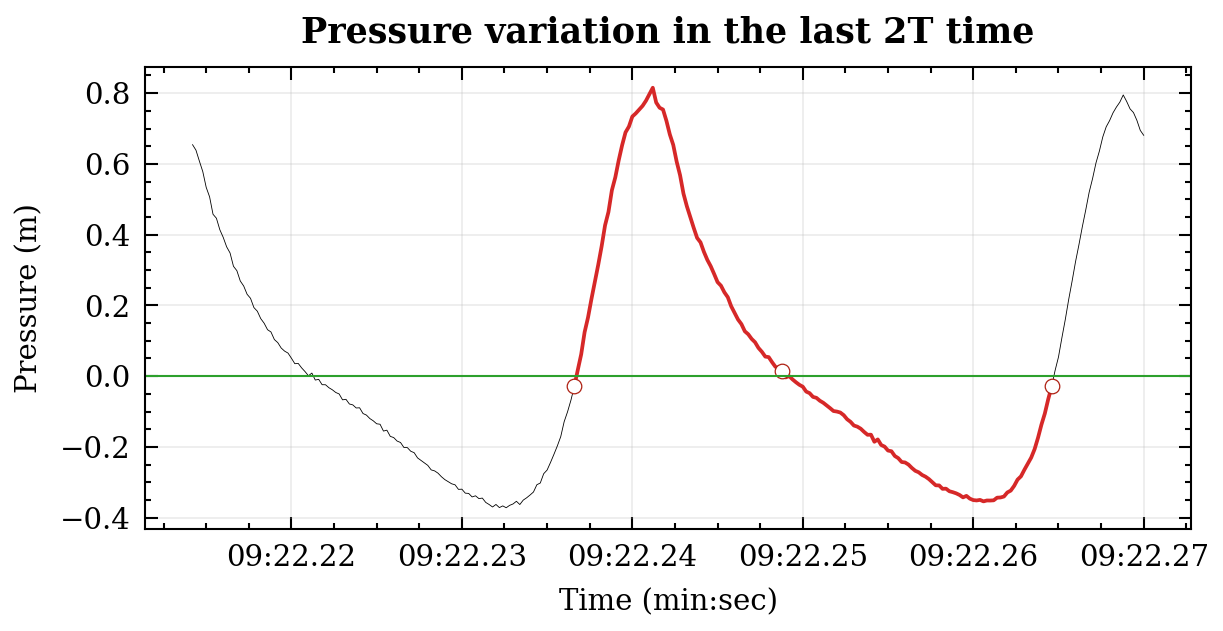

In [335]:
plt.figure(figsize =(4.5,2.0), dpi = 300)
plt.plot(
    temp_p_variations, 'k',linewidth = 0.2
)
plt.plot(
    selected_signal, '#d62828',linewidth = 0.9
)
plt.plot(
    zero_crossings,
    'w.', ms = 7, mew =0.3, mec = '#ae2012'
)
 
plt.xlabel("Time (min:sec)")
plt.ylabel("Pressure (m)")

plt.grid(linewidth = 0.1)

# Customize x-axis tick format
plt.gca().xaxis.set_major_formatter(
    plt.FixedFormatter(
        [dt.strftime('%M:%S.%f')[:-4] for dt in temp_p_variations.index]
    )
)
plt.axhline(color = 'tab:green',linewidth = 0.5)
# legend =  plt.legend(,frameon=True)
# legend.get_frame().set_linewidth(0.4)
# legend.get_frame().set_edgecolor("k")
plt.title('Pressure variation in the last 2T time', fontweight="bold")
plt.show()

# Calculating the mean pressure

In [339]:
selected_signal.mean()

0.04847049524961078

In [338]:
selected_signal.abs().mean()

0.28438224476076807

In [1]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

# Extra works...

here I normally do extra calculations. stop! sign stops the code, hence, you need to come here and run them again...